#### USA Houseprices - Dataset 1 - Corrected - Excercise 1 - Timothy Gregorian

In this analysis, we explore a dataset of housing prices in the United States to understand the key factors that influence property values. The main goal is to build a predictive model using a deep learning neural network, which can accurately estimate house prices based on their characteristics.

In addition, we will analyze the correlations between the variables, since there is a possibility that the dataset may not be suitable for achieving a high R-squared score when evaluating the quality of the model.

#### Link to Dataset 1
https://www.kaggle.com/datasets/arnavgupta1205/usa-housing-dataset

#### Information about the Dataset
This USA Housing Market Dataset contains 300 rows and 10 columns of real-estate related data, which can be used for housing price predictions.

#### Data Description
The dataset consists of 10 variables related  to housing characteristics in the United States:

1) Price: The selling price of the house (target variable).

2) Bedrooms: Number of bedrooms in the house.

3) Bathrooms: Number of bathrooms in the house.

4) SquareFeet: Total living area in square feet.

5) YearBuilt: The year the property was constructed.

6) GarageSpaces: Number of garage spaces available.

7) LotSize: Size of the property lot.

8) ZipCode: Postal code indicating the geographical location of the    house (categorical variable).

9) CrimeRate: Crime index of the neighborhood where the house is located (0.0 - 100.0).

10) SchoolRating: Quality rating of nearby schools, ranging from 1 (lowest) to 10 (highest).

#### Imports / Modules

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

#### Loading the dataset

In [104]:
df = pd.read_csv("usa_housing_kaggle.csv")
df.head()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,221958,1,1.90,4827,1979,2,1.45,82240,48.60,5
1,771155,2,2.00,1035,1987,2,1.75,74315,92.03,9
2,231932,1,3.00,2769,1982,1,1.46,79249,52.08,3
3,465838,3,3.30,2708,1907,3,1.62,80587,61.65,1
4,359178,4,3.40,1175,1994,2,0.74,20756,15.66,4


Here we check the length of the dataset:

In [105]:
len(df)

300

#### Handle missing values

According to the table below, we do not have any missing values:

In [106]:
df.isna().sum()

Price           0
Bedrooms        0
Bathrooms       0
SquareFeet      0
YearBuilt       0
GarageSpaces    0
LotSize         0
ZipCode         0
CrimeRate       0
SchoolRating    0
dtype: int64

We also do not have any duplicates:

In [107]:
int(df.duplicated().sum())

0

#### X/y-Split

Here we perform a X/y- Split and we drop the target variable "price" as well as "ZipCode", because of previous attempts, by including this variable in the model, the R²-score got even more negative. Thus we leave it out:

In [108]:
X = df.drop(["Price", "ZipCode"], axis=1)

y = df["Price"]

<Axes: >

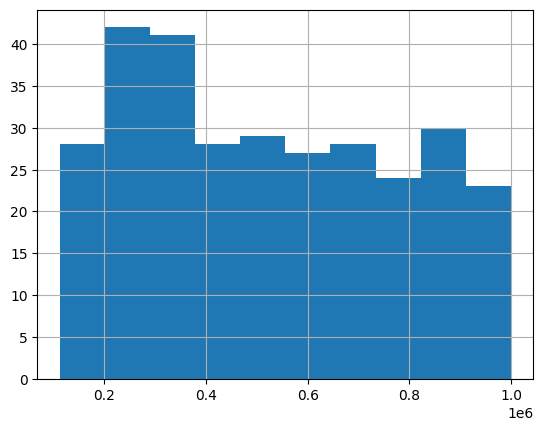

In [109]:
df['Price'].hist()

The histogram above shows the distribution of house prices in the USA. In general the house prices are evenly distributed, but the highest bars are in the lower to moddle price ranges.

#### Inspect the variables - Correlation

According to the correlation table, none of the support variables correlate with the target variable price.

In [110]:
correlations = df.corr(numeric_only=True)
correlations

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
Price,1.00,0.02,0.04,0.04,0.01,0.01,-0.02,-0.02,0.01,0.02
Bedrooms,0.02,1.00,-0.04,-0.06,-0.03,-0.04,-0.05,0.11,0.01,0.01
Bathrooms,0.04,-0.04,1.00,0.01,-0.07,-0.01,-0.10,0.04,0.01,0.06
SquareFeet,0.04,-0.06,0.01,1.00,-0.00,0.05,0.01,-0.01,-0.04,0.00
YearBuilt,0.01,-0.03,-0.07,-0.00,1.00,0.09,-0.10,-0.03,-0.02,0.00
GarageSpaces,0.01,-0.04,-0.01,0.05,0.09,1.00,0.11,0.01,-0.01,0.03
LotSize,-0.02,-0.05,-0.10,0.01,-0.10,0.11,1.00,0.12,0.03,-0.04
ZipCode,-0.02,0.11,0.04,-0.01,-0.03,0.01,0.12,1.00,-0.01,-0.03
CrimeRate,0.01,0.01,0.01,-0.04,-0.02,-0.01,0.03,-0.01,1.00,-0.02
SchoolRating,0.02,0.01,0.06,0.00,0.00,0.03,-0.04,-0.03,-0.02,1.00


#### Fisher's score

The Fisher Score Test shows that the variables GarageSpaces, SchoolRating and CrimeRate have the strongest influence in this dataset.

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


<Axes: >

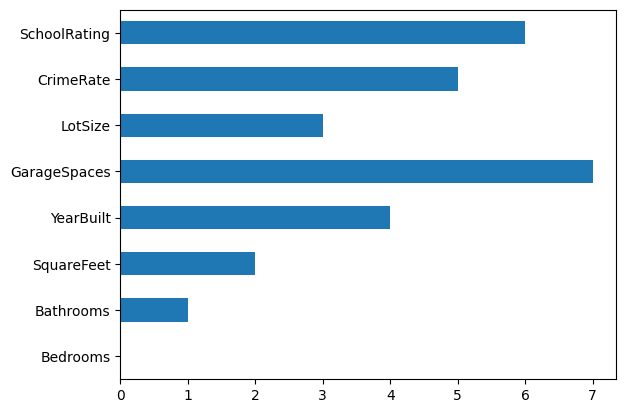

In [111]:
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(X.values, y.values)
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

#### SelectKBest-Score

The Chi²-Test shows that the variables SquareFeet and CrimeRate havve the highest score and therefore are imporant when predicting house prices.

In [112]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))
best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
2,SquareFeet,139860.48
6,CrimeRate,5086.90
7,SchoolRating,419.53
4,GarageSpaces,246.44
0,Bedrooms,212.25
3,YearBuilt,197.50
5,LotSize,139.66
1,Bathrooms,109.25


#### VIF-Test

The VIF-Test shows that most features like Bedrooms, Bathrooms and SquareFeet have low collinearity, meaning that those three variables have a strong correlation with each other.

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)

        feature   VIF
0      Bedrooms  5.22
1     Bathrooms  8.79
2    SquareFeet  7.59
3     YearBuilt 32.39
4  GarageSpaces  2.90
5       LotSize  4.90
6     CrimeRate  3.94
7  SchoolRating  4.67


#### Train/test/validation -split

In [114]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

#### Create the neural network structure

Here next to the Normalization we also tried to add Regularsation, to see if the model will perform better, when being trained. The code was used from the professor's Github.

In [115]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

variable_amount = len(X.columns)

mc = ModelCheckpoint('best_model_small_dataset.keras', monitor='val_loss', mode='min', save_best_only=True)

callback_list = [mc]

model4 = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.1)),
        layers.Dropout(0.2),
        layers.Dense(10, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

model4.compile(optimizer='adam', loss='mse')
model4.summary()

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_6           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 427 (1.67 KB)

 Non-trainable params: 16 (64.00 B)

#### Training of the Model

In [116]:
model4.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 328198750208.0000 - val_loss: 364631523328.0000
Epoch 2/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 328198651904.0000 - val_loss: 364644073472.0000
Epoch 3/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 328198520832.0000 - val_loss: 364648628224.0000
Epoch 4/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 328198389760.0000 - val_loss: 364650790912.0000
Epoch 5/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 328198225920.0000 - val_loss: 364651544576.0000
Epoch 6/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 328198094848.0000 - val_loss: 364651675648.0000
Epoch 7/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 328197865472.0000 - val_loss: 364651347968.0000
Epoch 8/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 328197603328.0000 - val_loss: 364650463232.0000
Epoch 9/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 328197406720.0000 - val_loss: 364648824832.0000
Epoch 10/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/

#### Performance and Error Metrics

In the graph below we see that both lines loss and val_loss drop significantly in the first 100 epochs and after 150 epochs the line straightens, showing a sign of the model overfitting.

<Axes: >

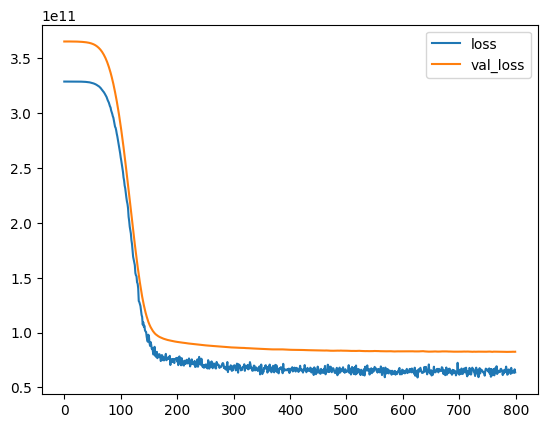

In [117]:
loss_df = pd.DataFrame(model4.history.history)
loss_df.plot()

#### Load the best model version

In [118]:
from keras.models import load_model
model4 = load_model("best_model_small_dataset.keras")

In [119]:
print("Test data evaluation:")
print(model4.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model4.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
78365007872.0

Train data evaluation:
60481179648.0


In [120]:
test_predictions = model4.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


,Test True Y,Model Predictions
0,291335,472923.81
1,691723,524137.94
2,318969,562717.44
3,210268,550035.44
4,911774,532511.69
5,910208,485841.81
6,414877,493791.53
7,165318,524741.50
8,339629,520990.06
9,400804,509723.84


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

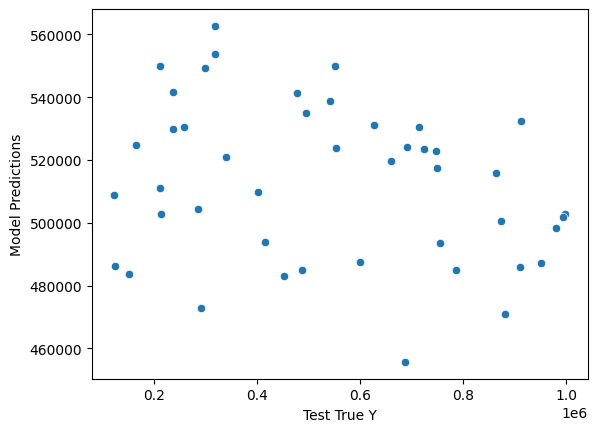

In [121]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [122]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
242821.09 $

MSE
78364999680.0 $^2

RMSE:
279937.49 $

R-squared:
-0.06

Explained variance score:
-0.05


Unfortunately the error metrics show a negative R²-score.

C:\Users\Timothy\AppData\Local\Temp\ipykernel_13356\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


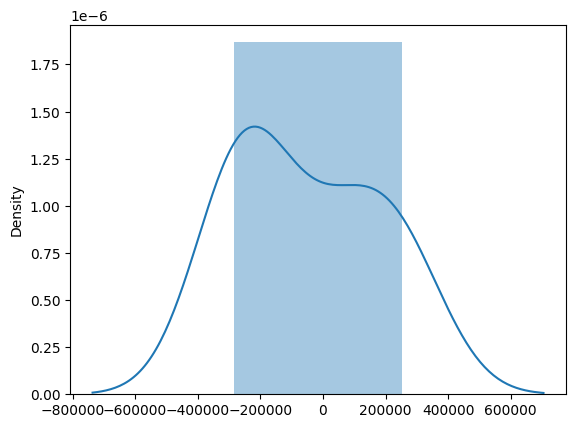

In [123]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [124]:
df.columns

Index(['Price', 'Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt',
       'GarageSpaces', 'LotSize', 'ZipCode', 'CrimeRate', 'SchoolRating'],
      dtype='object')

#### Trying the model in practice with new imaginery house

In [125]:
tester_row = {
    "Bedrooms": 5,
    "Bathrooms": 3.7,
    "SquareFeet": 3530,
    "YearBuilt": 1954,
    "GarageSpaces": 2,
    "LotSize": 0.74,
    "CrimeRate": 2.91,
    "SchoolRating": 6
}

tester_row = pd.DataFrame([tester_row])


In [126]:
result = model4.predict(tester_row)[0]

print()
print(f"Estimated house price:")
print(f"$ {round(float(result[0]), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Estimated house price:
$ 517121.97
----------------
